# **Web Scraping and Linguistic Analysis** 📊
In this project, I used Python to conduct linguistic analysis on text extracted from a [webpage](https://nautil.us/never-say-wolf-237701/). Throughout the process, I used **requests** and **BeautifulSoup** labraries to scrape the content from the URL. Subsequently, I applied **nltk** library and **regular expressions** (**re** module) to perform the following linguistic tasks:
* Tokenization and POS Tagging
* POS Tag Frequency Analysis
* Word Length Analysis
* Word Frequency Analysis
* Past Continuous Tense Analysis

## 1. Importing Modules
The first stage of the analysis is to import the required modules:

In [12]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import re
import matplotlib.pyplot as plt

**Requests** and **BeautifulSoup** enable web scraping, while **nltk**, **Counter**, and **re** enable data analysis in the field of Natural Language Processing (NLP). **matplotlib** is used to create a bar chart.

## 2. Web Scraping

In [13]:

page = requests.get("https://nautil.us/never-say-wolf-237701/")

soup = BeautifulSoup(page.content, 'html.parser')

paragraphs = soup.find_all('p')

only_text = []

for el in paragraphs:
    if len(el.getText().strip()) > 0:
        only_text.append(el.getText())



In this section, the text content is being scraped from a [webpage](https://nautil.us/never-say-wolf-237701/). **Requests** is used to fetch the text, and **BeautifulSoup** is employed to parse the HTML content. Subsequently, all paragraph elements are found applying **soup.find_all("p")**, and the text is appended to the list after removing unnecessary whitespaces.

## 3. Tokenization and Parts-of-Speech Tagging

In [14]:
pos_tagged_tokens = []

for sentence in only_text:
    tokens = nltk.word_tokenize(sentence)
    pos_tagged = nltk.pos_tag(tokens)
    for item in pos_tagged:
        pos_tagged_tokens.append(item)


Next, the text undergoes parts-of-speech (POS) tagging. Firstly, the text is tokenized into words applying **nltk.word_tokenize()**. Then, the words are tagged using **nltk.pos_tag()**. The POS tags are then stored in a list.

## 4. POS Tag Frequency Analysis

In [15]:
pos_tags_list = [tag for word, tag in pos_tagged_tokens]
pos_tag_counts = Counter(pos_tags_list)
print(pos_tag_counts)

Counter({'NN': 352, 'IN': 276, 'DT': 225, 'NNP': 162, 'JJ': 159, 'NNS': 154, ',': 148, '.': 104, 'CC': 67, 'RB': 62, 'VBN': 57, 'VBP': 55, 'VBZ': 54, 'VBD': 50, 'VBG': 48, 'VB': 47, 'PRP': 46, 'TO': 34, 'PRP$': 18, 'MD': 18, 'WRB': 13, 'WDT': 11, 'CD': 10, 'RP': 8, 'WP': 7, ':': 5, '(': 4, ')': 4, 'NNPS': 4, 'JJS': 3, 'EX': 2, 'RBR': 2, 'JJR': 2, 'RBS': 2})


The occurrence of each Part-of-Speech tag is counted using **Counter**.

To display only the most common parts of speech the **.most_common(5)** method is used.

[('NN', 352), ('IN', 276), ('DT', 225), ('NNP', 162), ('JJ', 159)]


<BarContainer object of 5 artists>

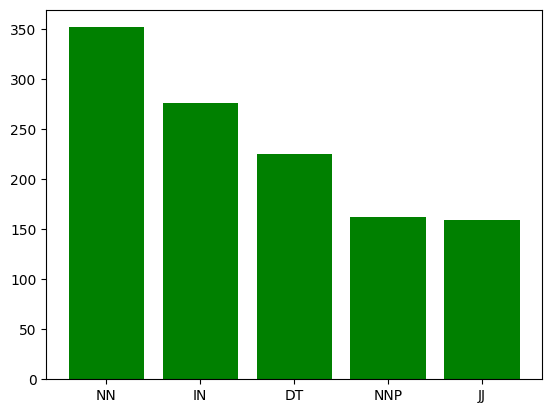

In [16]:
most_common_pos = pos_tag_counts.most_common(5)
print(most_common_pos)
tags, counts = zip(*most_common_pos)
plt.bar(tags[0:8], counts[0:8], color = "green")

The five most common POS tags are split into separate lists of tags and their counts with zip(\*most_common_pos). The bar chart is displayed using **plt.bar()**.

## 5. Word Length Analysis

In [17]:
all_text = ' '.join(only_text)
words = re.findall(r'\b\w+\b', all_text)
word_lengths = [len(word) for word in words]
length_freq = Counter(word_lengths)
print(length_freq)

Counter({4: 391, 3: 352, 2: 281, 5: 222, 6: 198, 7: 184, 8: 119, 9: 94, 1: 62, 10: 30, 11: 19, 12: 6, 14: 3, 18: 2, 15: 1, 13: 1})


After concatenating all the text into a single string by **.join()**, **regular expressions** are utilized to find all words in the text. The expression matches patterns consisting of a word boundary (\b) followed by one or more word characters (w+) and a word boundary (\b). Next, the length of words is calculated using a **for loop** in a **list comprehension**. Finally, **Counter** is applied to calculate the frequency of each word length.


In [18]:
print(length_freq.most_common(10))

[(4, 391), (3, 352), (2, 281), (5, 222), (6, 198), (7, 184), (8, 119), (9, 94), (1, 62), (10, 30)]


Again, the **.most_common()** method is used to display only the most frequent number of letters in a word.

In [19]:
total_words = len(words)

total_letters = 0
for word in words:
  total_letters += len(word)

avg_letters_for_words = total_letters / total_words

print(f"Average word length: {avg_letters_for_words}")

Average word length: 4.740458015267175


After determining the total number of words in the text by the **len** function, each word is iterated through, and their length is summed. The average word length is counted by dividing the total number of letters by the total number of words.

## 6. Word Frequency Analysis

In [20]:
def find_word_frequency(word):
  pattern = fr'\b{word}\b'
  matches = re.findall(pattern, all_text, re.IGNORECASE)
  return f"The total number of the word in the text: {len(matches)}"

print(find_word_frequency("wolf"))

The total number of the word in the text: 32


In this section, a **find_word_frequency()** function is defined to count the frequency of a specific word in the text. It takes a string as input. Inside the function, a **regex** pattern is constructed to match the given word. \b is applied to match word boundaries. The usage of **formatted string** allows the user to dynamically insert the word into the pattern.

## 7. Past Continuous Tense Analysis

In [21]:
pattern_neg_pos = r"\b(was(n't| not)?|were(n't|not)?)\s+\w+ing\b"
matches_neg_pos = re.findall(pattern_neg_pos, all_text, re.IGNORECASE)
neg_pos = len(matches_neg_pos)

pattern_ques = r"\b(were|was)\s+\w+\s+\w+ing?\b"
matches_ques = re.findall(pattern_ques, all_text, re.IGNORECASE)
ques = len(matches_ques)

print(f"The number of past continuous used in negative and positive sentences: {neg_pos}")
print(f"The number of past continuous used in questions: {ques}")
print(f"Total number of past continuous used in the text: {neg_pos + ques}")

The number of past continuous used in negative and positive sentences: 2
The number of past continuous used in questions: 1
Total number of past continuous used in the text: 3


In this stage, the occurrences of past continuous tense in the text are counted. Firstly, the **regex** pattern is constructed to match positive and negative sentences:
* **\b** - asserts a word boundary
* **was(n't| not)?|were(n't|not)?** - matches _was_ or _were_ followed by an optional _n't_ or _not_
* **\s+** - matches one or more whitespace characters
* **\w+ing\b** - matches one or more word characters followed by _ing_ and asserts a word boundary to ensure it ends with _ing_

Subsequently, **re.findall** finds all occurrences of the pattern in the text, ignoring case, and the **len** function counts the number of matches - the number of past continuous forms used in positive and negative sentences.

Next, the occurrence of questions is counted. Again, firstly, the **regex** pattern is established:
* **\b(were|was)** - matches _were_ or _was_
* **\s+** - matches one or more whitespace characters
* **\w+** - matches one or more word characters (the subject of the sentence)
* **\s+** - matches one or more whitespace characters
* **\w+ing\b** - matches one or more word characters ending with _ing_ and asserts a word boundary

Again, **re.findall** finds all occurrences of the pattern in the text, ignoring case, and the **len** function counts the number of matches - the number of interrogative structures used in the text.

#Summary
In this project, Python is utilized to perform linguistic analysis on text extracted from a webpage. The process includes the following steps:

1. Web Scraping
2. Tonenization and POS Tagging
3. POS Tag Frequency Analysis
4. Word Length Analysis
5. Word Frequency Analysis
6. Past Continuous Tense Analysis
